# Correctness and difficulty

### Is there a statistically significant difference in the correctness of answers depending on the assessment of the task difficulty?
- summed graphics
- each graphic separately

### Is there a statistically significant difference in the assessment of task difficulty depending on correctness?
- each graphic separately

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.tests.independent_groups.more_than_two_groups import chi2_or_chi2_yate_test
from functions.tests.independent_groups.two_groups import mann_whitney_test
from functions.tests.helper import create_contingency_table
from functions.others import corr_answer_index
from functions.plots import plot_heatmap

In [75]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_answers.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,SumCorr_a,SumCorr_b,SumCorr_1,SumCorr_2,SumCorr_3,SumTrud_a,SumTrud_b,SumTrud_1,SumTrud_2,SumTrud_3
0,1,3,1,4,3,4,4,19,4,1,...,2,2,2,0,2,11,8,4,7,8
1,2,1,2,3,1,2,4,13,5,1,...,2,3,2,2,1,6,7,3,4,6
2,3,2,1,3,1,1,1,9,4,1,...,2,2,2,2,0,6,3,3,4,2
3,4,3,2,2,1,3,5,16,5,1,...,3,2,2,2,1,8,8,5,3,8
4,5,4,2,3,2,3,3,17,6,1,...,3,3,2,2,2,10,7,6,5,6


### Is there a statistically significant difference in the correctness of answers depending on the assessment of the task difficulty?

##### H0: There is no statistically significant relationship between the correctness of the answer and the level of difficulty.

##### H1: There is a statistically significant relationship between the correctness of the answer and the level of difficulty.

##### Significance level: $\alpha=0.05$

In [76]:
ALPHA = 0.05

Summed graphics

In [77]:
chi2_or_chi2_yate_test(df_answers, 'Corr_all', 'Trud_all', ALPHA)

Trud_all  9   10  11  12  13  14  15  16  17  18  19  20  22
Corr_all                                                    
0          0   0   0   0   0   0   0   0   1   0   0   0   0
2          0   0   1   1   0   1   0   0   0   0   0   0   0
3          0   1   2   0   1   1   0   1   1   0   0   0   1
4          1   1   0   0   1   2   0   0   0   0   1   2   0
5          0   2   0   1   3   1   2   2   0   0   1   1   0
6          0   0   0   0   0   1   1   2   1   2   0   0   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 64.39010989010988
P-value: 0.325660557245181
No reason to reject H0, accept H0.


'0.33'

Tasks without redundancy

In [78]:
chi2_or_chi2_yate_test(df_answers, 'SumCorr_a', 'SumTrud_a', ALPHA)

SumTrud_a  5   6   7   8   9   10  11  12
SumCorr_a                                
0           0   0   0   1   0   0   0   0
1           0   3   2   2   0   0   0   1
2           1   9   1   1   2   1   1   0
3           1   1   3   8   0   1   1   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 24.174145299145295
P-value: 0.28469741671589727
No reason to reject H0, accept H0.


'0.28'

Tasks with redundancy

In [79]:
chi2_or_chi2_yate_test(df_answers, 'SumCorr_b', 'SumTrud_b', ALPHA)

SumTrud_b  3   4   5   6   7   8   9   10  11  12
SumCorr_b                                        
0           0   0   0   0   0   0   1   0   0   0
1           0   1   2   2   0   1   0   0   0   0
2           1   1   3   0   4   7   0   3   1   1
3           0   2   0   1   4   2   1   2   0   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 39.52380952380952
P-value: 0.056732340682468206
No reason to reject H0, accept H0.


'0.06'

Each task separately

In [80]:
chi2_or_chi2_yate_test(df_answers, 'SumCorr_1', 'SumTrud_1', ALPHA)
print('-------------------------')
chi2_or_chi2_yate_test(df_answers, 'SumCorr_2', 'SumTrud_2', ALPHA)
print('-------------------------')
chi2_or_chi2_yate_test(df_answers, 'SumCorr_3', 'SumTrud_3', ALPHA)

SumTrud_1  2  3  4   5  6  7
SumCorr_1                   
0          0  0  0   2  0  0
1          0  1  2   1  0  0
2          4  6  6  12  4  2
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 6.831932773109244
P-value: 0.7412105598869706
No reason to reject H0, accept H0.
-------------------------
SumTrud_2  2  3  4  5  6  7  8
SumCorr_2                     
0          0  0  2  1  1  2  2
1          0  0  4  0  2  1  0
2          3  8  6  4  2  2  0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 21.080000000000005
P-value: 0.04922117692231862
There are grounds to reject H0, accept H1.
-------------------------
SumTrud_3  2  3  4  5  6  7  8  9
SumCorr_3                        
0          3  0  3  5  1  0  0  0
1          0  2  3  2  3  1  2  3
2          0  0  1  0  3  3  4  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 29.424603174603174
P-value: 0.009151011697495505
There are grounds

'0.01'

Each graphic separately

In [81]:
df1a = pd.DataFrame({'correctness': df_answers['1a_corr'], 'difficulty': df_answers['1a_trud']})
df2a = pd.DataFrame({'correctness': df_answers['2a_corr'], 'difficulty': df_answers['2a_trud']})
df3a = pd.DataFrame({'correctness': df_answers['3a_corr'], 'difficulty': df_answers['3a_trud']})

df1b = pd.DataFrame({'correctness': df_answers['1b_corr'], 'difficulty': df_answers['1b_trud']})
df2b = pd.DataFrame({'correctness': df_answers['2b_corr'], 'difficulty': df_answers['2b_trud']})
df3b = pd.DataFrame({'correctness': df_answers['3b_corr'], 'difficulty': df_answers['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]

In [82]:
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [83]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    chi2_or_chi2_yate_test(df, 'correctness', 'difficulty', ALPHA)

-------------------------------------
1a:
difficulty   1   2   3  4  5
correctness                 
0            1   2   2  0  0
1            6  12  12  4  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.8163265306122449
P-value: 0.9362459604000678
No reason to reject H0, accept H0.
-------------------------------------
1b:
difficulty    1   2  3  4
correctness              
0             1   2  0  0
1            12  17  7  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.9001714264872159
P-value: 0.8253864396822264
No reason to reject H0, accept H0.
-------------------------------------
2a:
difficulty   1   2  3  4  5
correctness                
0            0   2  4  5  1
1            8  13  7  0  0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 19.624819624819626
P-value: 0.00059217090063551
There are grounds to reject H0, accept H1.
-------------------------------------
2b:
diffi

### Summary:

There is a statistically significant relationship between the correctness of the answer and the level of difficulty at the significance level $\alpha=0.05$ for:
- summed graphics: 2, 3
- graphics 2a (trend: correct assessment of difficulty)
- graphics 3a (trend: underestimation of the task difficulty)

### Is there a statistically significant difference in the assessment of task difficulty depending on correctness?

##### H0: There is no statistically significant relationship between the difficulty of the task and the correctness of the answer.

##### H1: There is a statistically significant relationship between the difficulty of the task and the correctness of the answer.

##### Significance level: $\alpha=0.05$



In [84]:
def plot_multi_boxplot_t(dfex: pd.DataFrame, category_param: str, continue_param: str, label_category: str, label_continue: str, annotate: bool):
    sns.set(style="whitegrid")
    plt.figure(figsize=(3, 4))
    
    ax = sns.boxplot(data=dfex, x=category_param, y=continue_param, orient="v", width=0.6)
    plt.grid(True, axis='y')
    plt.xlabel(label_category)
    plt.ylabel(label_continue)

    ax.set_xticks(['0', '1'])
    
    if annotate:
        plt.annotate( '', xy=(0.25, 1.03), xycoords='axes fraction', xytext=(0.75, 1.03),textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.5, 1.01), xycoords='axes fraction', textcoords='axes fraction',ha='center', va='bottom', fontsize=15)

    plt.show()

U-statistic: 75.0
p-value: 0.6066318186823905
No reason to reject H0, accept H0.


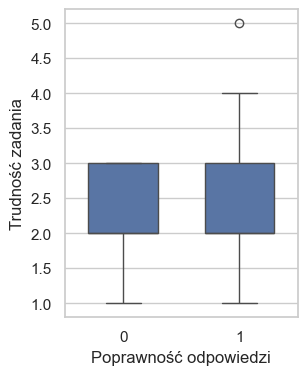

In [85]:
df = df1a.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', False)

U-statistic: 47.0
p-value: 0.6565972744469257
No reason to reject H0, accept H0.


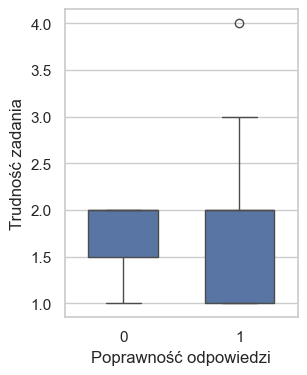

In [86]:
df = df1b.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', False)

U-statistic: 295.0
p-value: 9.6718500583849e-05
There are grounds to reject H0, accept H1.


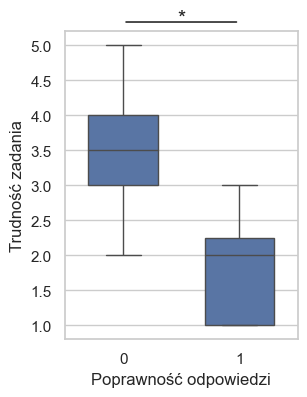

In [87]:
df = df2a.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', True)

U-statistic: 241.0
p-value: 0.010257173549840544
There are grounds to reject H0, accept H1.


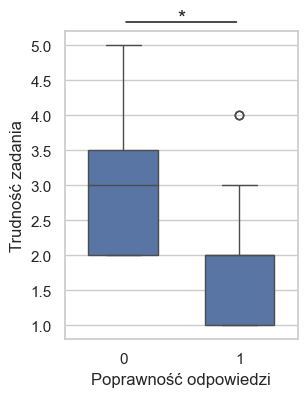

In [88]:
df = df2b.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', True)

U-statistic: 74.5
p-value: 0.0005395670128607012
There are grounds to reject H0, accept H1.


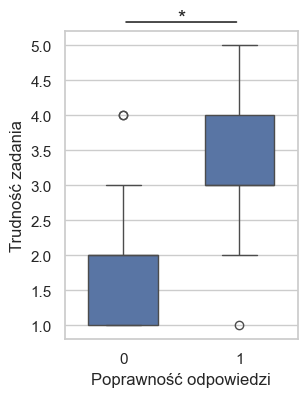

In [89]:
df = df3a.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', True)

U-statistic: 119.5
p-value: 0.028044959205307383
There are grounds to reject H0, accept H1.


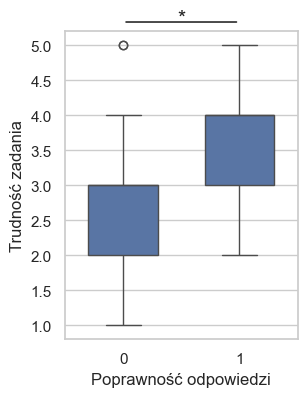

In [90]:
df = df3b.copy()

mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)

plot_multi_boxplot_t(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania', True)

Summary:
Statistical significance was found for:
- 2a, 2b, 3a, 3b

### EXTRA PLOTS

1. Heatmaps

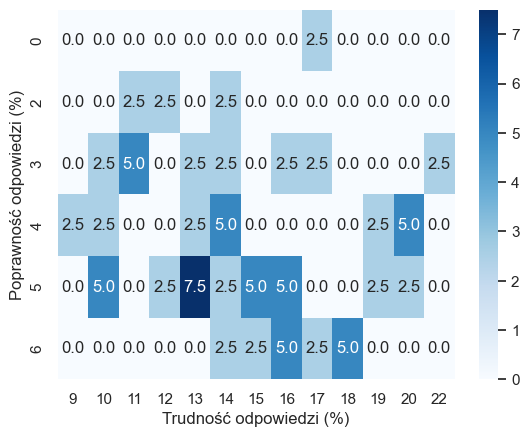

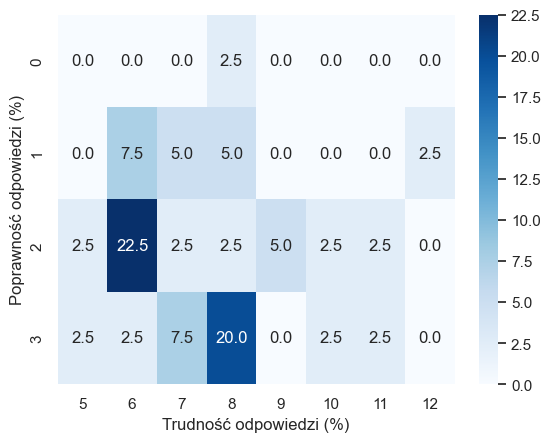

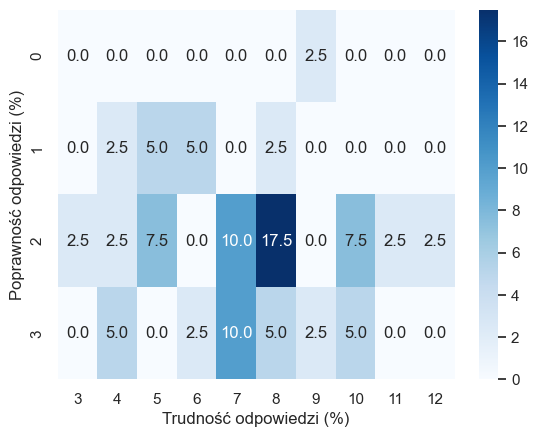

In [91]:
plot_heatmap(df_answers, 'Corr_all', 'Trud_all', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_a', 'SumTrud_a', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_b', 'SumTrud_b', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

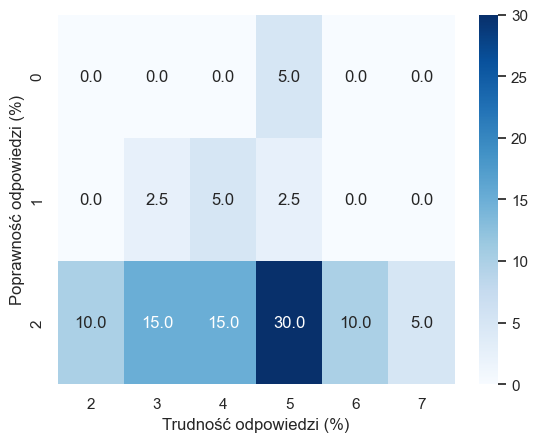

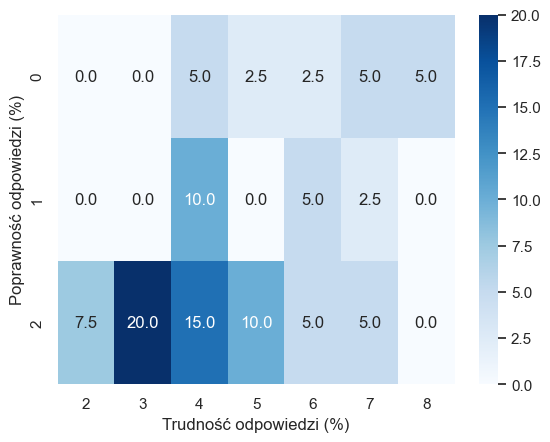

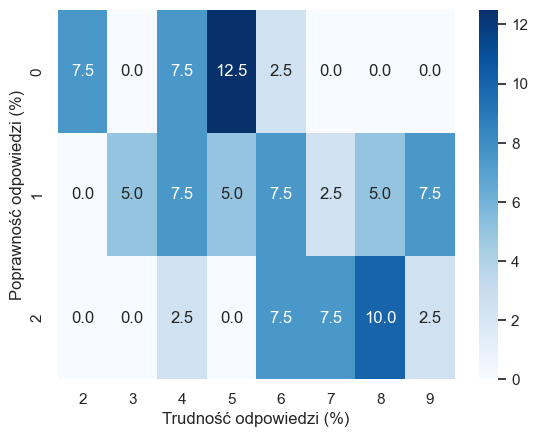

In [92]:
plot_heatmap(df_answers, 'SumCorr_1', 'SumTrud_1', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_2', 'SumTrud_2', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_3', 'SumTrud_3', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

-------------------------------------
1a:


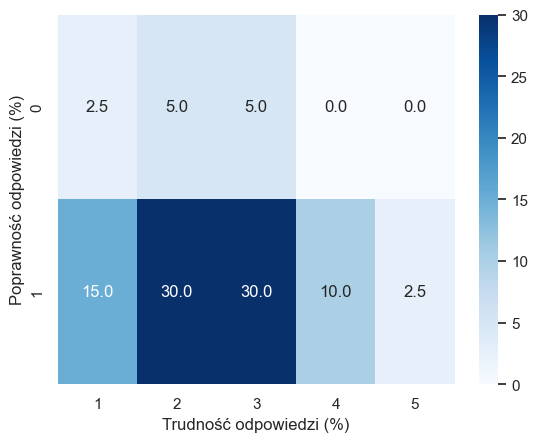

-------------------------------------
1b:


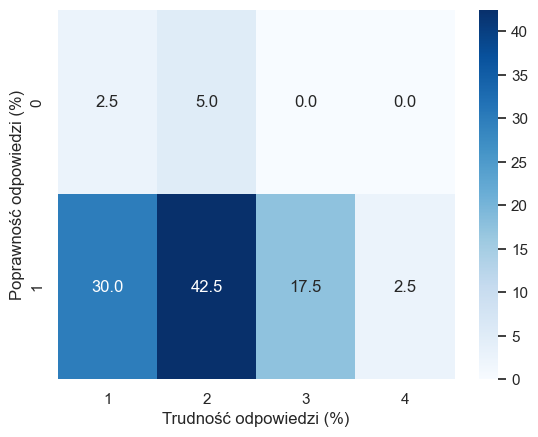

-------------------------------------
2a:


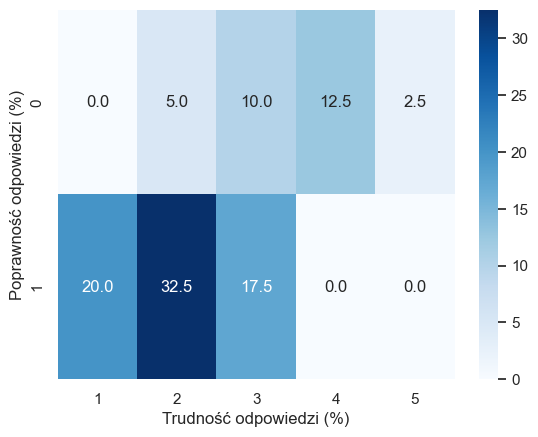

-------------------------------------
2b:


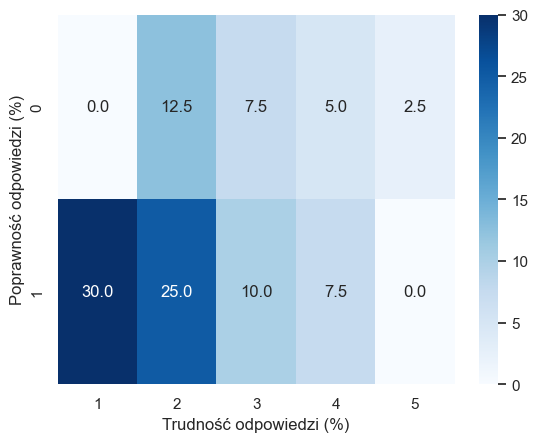

-------------------------------------
3a:


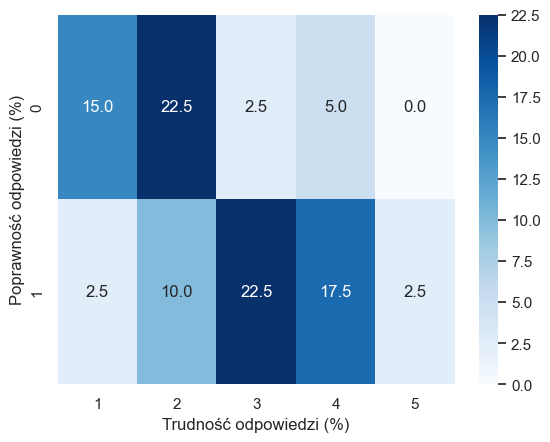

-------------------------------------
3b:


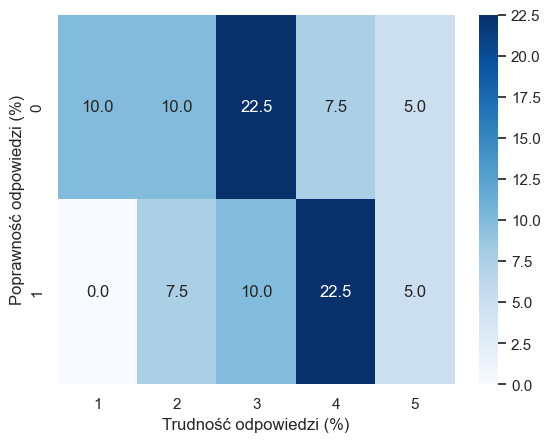

In [93]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i + 1])
    plot_heatmap(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

2. Correlation index

-------------------------------------
1a:
Trudność: 1, Wskaźnik: 0.8333333333333334
Trudność: 2, Wskaźnik: 0.8333333333333334
Trudność: 3, Wskaźnik: 0.8333333333333334
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


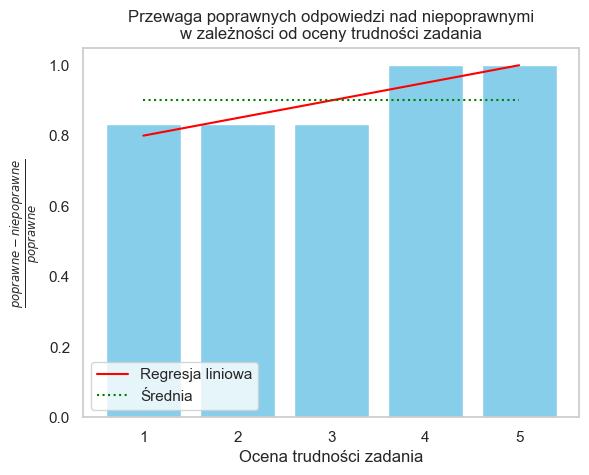

-------------------------------------
1b:
Trudność: 1, Wskaźnik: 0.9166666666666666
Trudność: 2, Wskaźnik: 0.8823529411764706
Trudność: 3, Wskaźnik: 1.0
Trudność: 4, Wskaźnik: 1.0


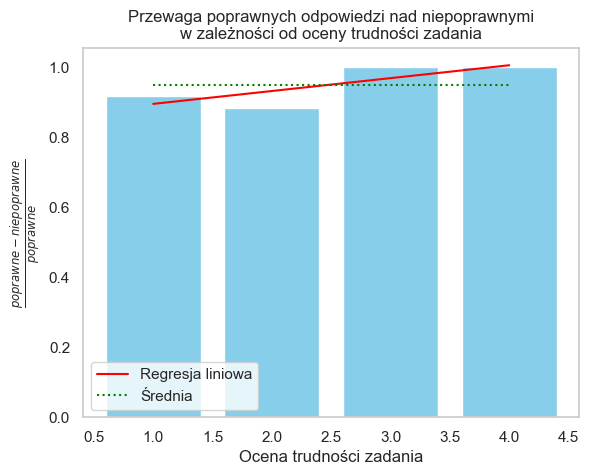

-------------------------------------
2a:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.8461538461538461
Trudność: 3, Wskaźnik: 0.42857142857142855


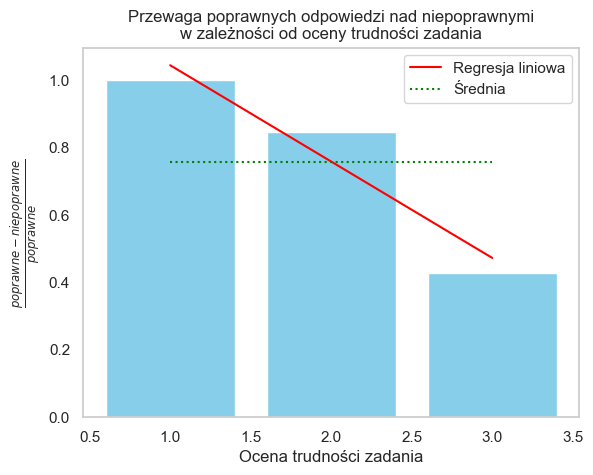

-------------------------------------
2b:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.5
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.3333333333333333


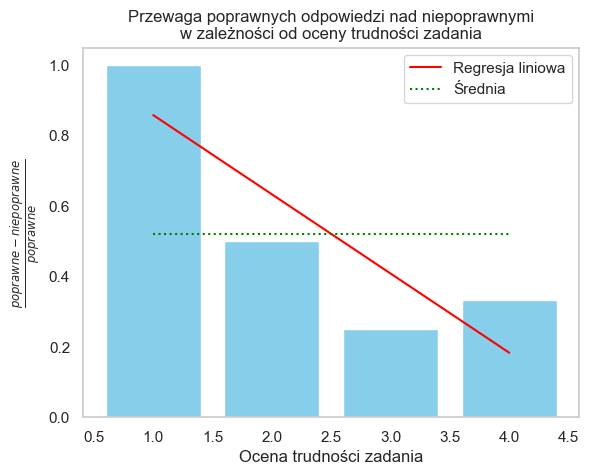

-------------------------------------
3a:
Trudność: 1, Wskaźnik: -5.0
Trudność: 2, Wskaźnik: -1.25
Trudność: 3, Wskaźnik: 0.8888888888888888
Trudność: 4, Wskaźnik: 0.7142857142857143
Trudność: 5, Wskaźnik: 1.0


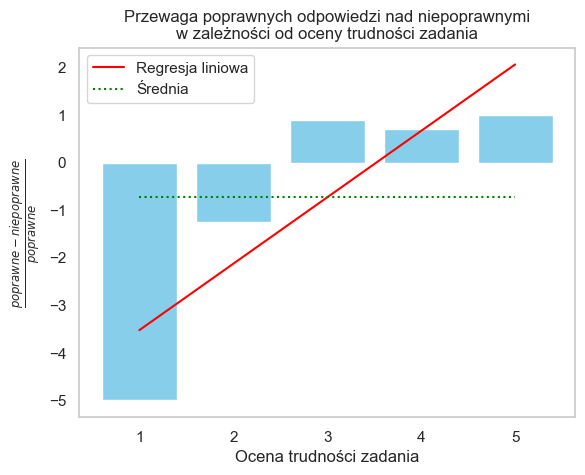

-------------------------------------
3b:
Trudność: 2, Wskaźnik: -0.3333333333333333
Trudność: 3, Wskaźnik: -1.25
Trudność: 4, Wskaźnik: 0.6666666666666666
Trudność: 5, Wskaźnik: 0.0


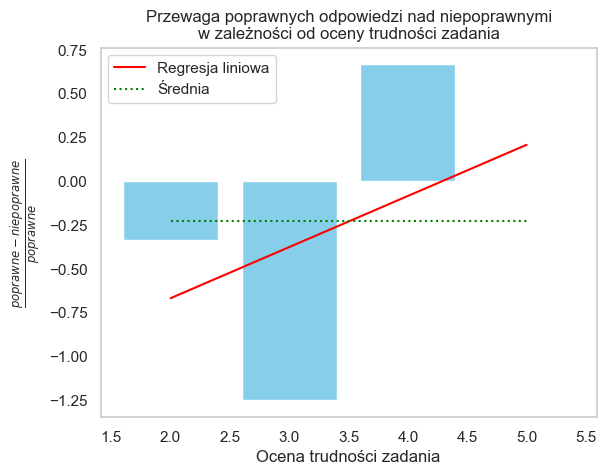

In [94]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i + 1])
    corr_answer_index(create_contingency_table(df, 'correctness', 'difficulty'))